## About

we want to detect objects on ir images. for this we can use couple of datasets (for example KAIST for pedestrian). but all of them small and may be insufficient for our problems. but let's start from training simple detectors on KAIST.

# Pedestrian (mid oct)

## Tiny YOLO

It is possible to train yolo on KAIST with single object (person) in images. For this all we need is to change darknet configuration files for this models and create right labeling. Then it takes about several hours a day to train model. ( I achieve loss about ~4 for this problem, I have not yet studied how much we can improve this result for this model.

Below are examples of the model outputs.

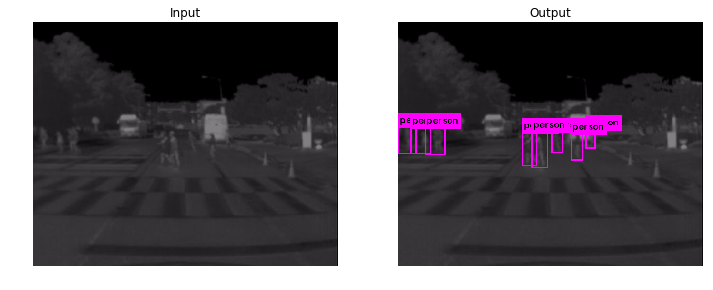

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(12, 6))
a=fig.add_subplot(1,2,1)
img_in = mpimg.imread('pics/pedestrian/input_tiny_yolo_lwir.png')
plt.imshow(img_in)
plt.axis('off')
a.set_title('Input')
a=fig.add_subplot(1,2,2)
plt.axis('off')
img_out = mpimg.imread('pics/pedestrian/preds_tiny_yolo_lwir.png')
plt.imshow(img_out)
a.set_title('Output')
plt.show()

Now we can test how it works for our camera.

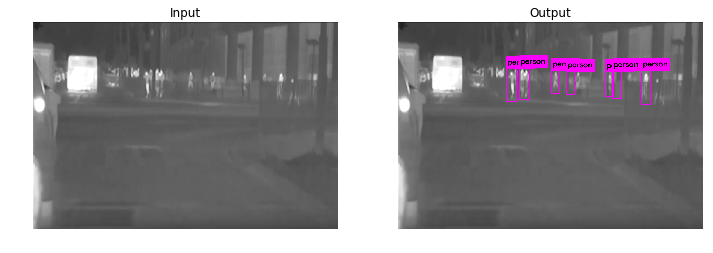

In [2]:
fig = plt.figure(figsize=(12, 6))
a=fig.add_subplot(1,2,1)
img_in = mpimg.imread('pics/pedestrian/our_input.png')
plt.imshow(img_in)
plt.axis('off')
a.set_title('Input')
a=fig.add_subplot(1,2,2)
plt.axis('off')
img_out = mpimg.imread('pics/pedestrian/our_output.png')
plt.imshow(img_out)
a.set_title('Output')
plt.show()

So we can achieve some adequate results using this dataset and models for pedestrian detection. If we want to find other objects we face problem of small amount of datasets and labeling for required objects. We can try to train some picture transfering models to create ir data from rgb. It is clear that it can't always work since we can have hot or cold cars. But for example for people detection it should work since peoples always 'hot' (white on our images). I try several model s and below is example of pix2pix model with unet style layers (skip connection layers). Training of this models takes long time (several days) but allows us to use good labeled datasets for our problem.

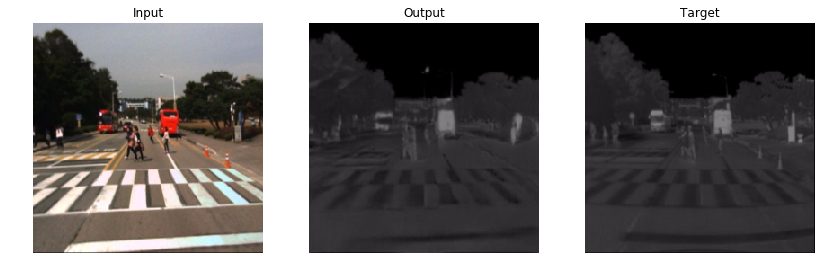

In [3]:
fig = plt.figure(figsize=(14, 6))
a=fig.add_subplot(1,3,1)
img_in = mpimg.imread('pics/pedestrian/input_pix2pix.png')
plt.imshow(img_in)
plt.axis('off')
a.set_title('Input')
a=fig.add_subplot(1,3,2)
plt.axis('off')
img_out = mpimg.imread('pics/pedestrian/output_pix2pix.png')
plt.imshow(img_out)
a.set_title('Output')
a=fig.add_subplot(1,3,3)
plt.axis('off')
img_out = mpimg.imread('pics/pedestrian/target_pix2pix.png')
plt.imshow(img_out)
a.set_title('Target')
plt.show()

And example of our tiny yolo prediction model on 'synthetic' data.

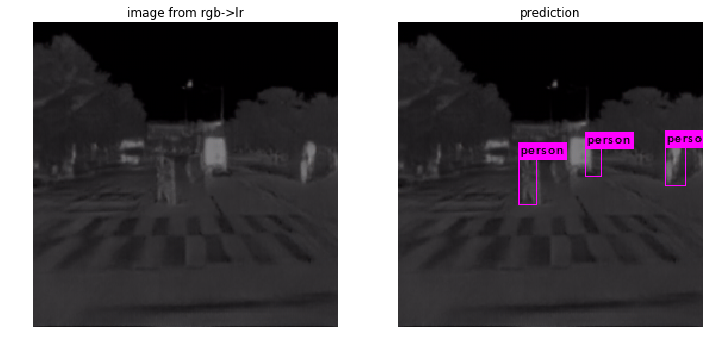

In [4]:
fig = plt.figure(figsize=(12, 6))
a=fig.add_subplot(1,2,1)
img_in = mpimg.imread('pics/pedestrian/output_pix2pix.png')
plt.imshow(img_in)
plt.axis('off')
a.set_title('image from rgb->lr')
a=fig.add_subplot(1,2,2)
plt.axis('off')
img_out = mpimg.imread('pics/pedestrian/preds_tiny_yolo_lwir_pix2pix_output.png')
plt.imshow(img_out)
a.set_title('prediction')
plt.show()

Next step is try to train models using synthetic data and try to train for example to detect cars.

# Cars (mid november)

Now we want to train model using only synthetic data for car detection. From previous section we have model for coloring from rgb -> ir. Next I download dataset from nexar challenge (https://www.getnexar.com/challenge-2/), it contains 50000 images from different locations with cars bounding boxes. Then we transfer this images into 256x256 size and apply coloring model. Below is the examples of images from nexar dataset:

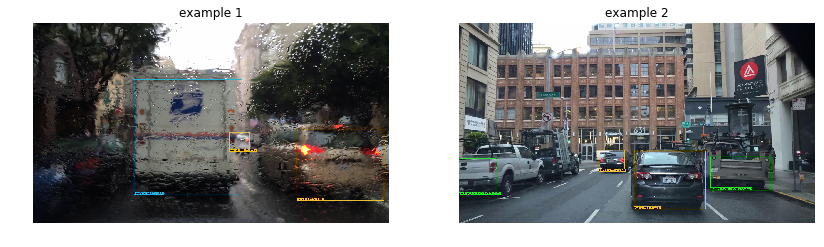

In [6]:
fig = plt.figure(figsize=(14, 6))
a=fig.add_subplot(1,2,1)
img_in = mpimg.imread('pics/cars/nexar_example_1.jpg')
plt.imshow(img_in)
plt.axis('off')
a.set_title('example 1')
a=fig.add_subplot(1,2,2)
plt.axis('off')
img_out = mpimg.imread('pics/cars/nexar_example_2.jpg')
plt.imshow(img_out)
a.set_title('example 2')
plt.show()

And examples of compressed and transformed images:

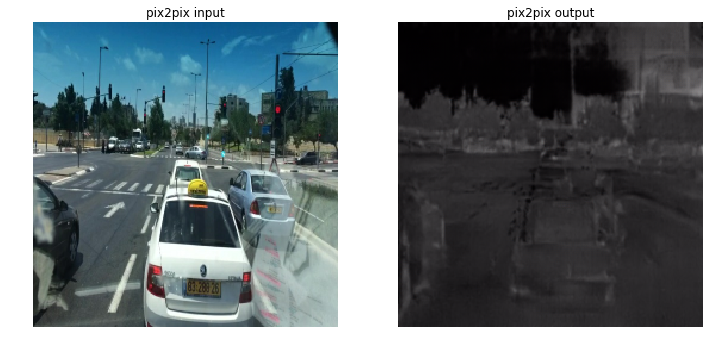

In [9]:
fig = plt.figure(figsize=(12, 6))
a=fig.add_subplot(1,2,1)
img_in = mpimg.imread('pics/cars/nexar_pix2pix_input.png')
plt.imshow(img_in)
plt.axis('off')
a.set_title('pix2pix input')
a=fig.add_subplot(1,2,2)
plt.axis('off')
img_out = mpimg.imread('pics/cars/nexar_pix2pix_output.png')
plt.imshow(img_out)
a.set_title('pix2pix output')
plt.show()

So we see that model doesn't work well for cars. It may happen because sometimes we have both white and black cars (rides or stands), second problem is that we use pix2pix architecture with unet style skip connections, so we expect that we have pixelwise correspondence between images (so this moedls for different types of colorization, not for geometrical transformations). We can try to train other models, for example unpaired GAN's like CycleGAN. If them failes we can try to give car segmentation/buinding box inside inpainting models to force the model to colorize machines. Finally we need to collect some dataset (maybe label images from KAIST, or label some part of our data) for better evaluation of models and in future for training.

Nevertheless even with such images (outputs from pix2pix) we can try to train some model. Again I take tiny yolo with same parameters and train at all nexar 50k images for half a day (not to convergence, just for experiments, I have loss about 10-11 - in comparision on pedestrian dataset we have about 4). Below couple of examples of model output.

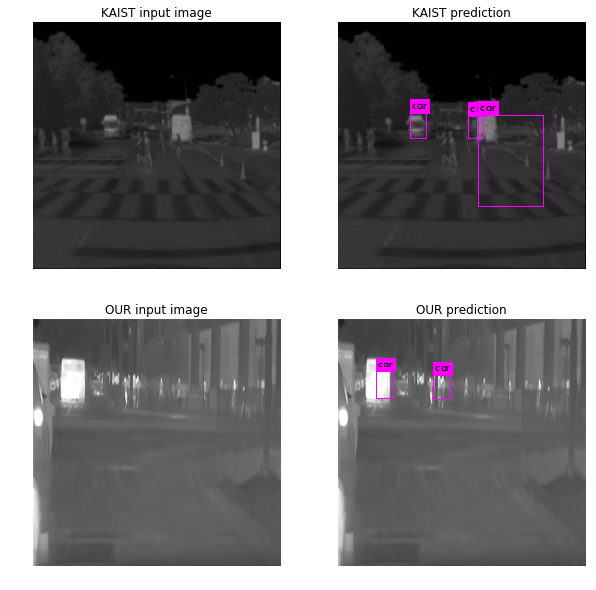

In [12]:
fig = plt.figure(figsize=(10, 10))
a=fig.add_subplot(2,2,1)
img_in = mpimg.imread('pics/cars/target_pix2pix.png')
plt.imshow(img_in)
plt.axis('off')
a.set_title('KAIST input image')
a=fig.add_subplot(2,2,2)
plt.axis('off')
img_out = mpimg.imread('pics/cars/predictions_on_initial.png')
plt.imshow(img_out)
a.set_title('KAIST prediction')
a=fig.add_subplot(2,2,3)
plt.axis('off')
img_out = mpimg.imread('pics/cars/our_square.png')
plt.imshow(img_out)
a.set_title('OUR input image')
a=fig.add_subplot(2,2,4)
plt.axis('off')
img_out = mpimg.imread('pics/cars/predictions_our.png')
plt.imshow(img_out)
a.set_title('OUR prediction')
plt.show()

So it find some cars but mostly fails (probably in nexar we have other cars size/camera proportions). So it doesn't work well for now. Probably better colorizing method can improve it, but for stable model we need to collect some data. After this final experiments we can continue working on detection on video task.